In [1]:
# uma classe para representar uum conjunto de bits
import numpy as np
import random

class BitSet: # classe para manipular o valor binario 
    def __init__(self, size): #tamanho do binario 3,4,5 bits
        self.bits = np.full((1, size), 0) # vai criar uma lista de lista com size elementos , 1 linha e size elementos com valor 0 inicial

    def get(self, index):
        return self.bits[0, index]

    def set(self, index, value): #adicionar um valor em uma posição especifica
        self.bits[0, index] = value

    def flip(self, index):  # complementar o valor daquele bit se for 0 fica 1 , se for 1 fica 0  
        self.bits[0, index] = not self.bits[0, index]

    def debug(self):  #printar o bits
        print(self.bits)

In [2]:
#testar
b =  BitSet(5)
b.debug()
b.set(2,1)
b.debug()
print(b.get(1))
print(b.get(2))

[[0 0 0 0 0]]
[[0 0 1 0 0]]
0
1


Cromossomo


In [3]:

class Chromossome:
    def __init__(self, x = None, y = None):
        if x == None:
            x = random.randint(-15, 15)  #fenotipo na base 10

        if y == None:
            y = random.randint(-15, 15)  #fenotipo na base 10

        self.__genes = Chromossome.get_genotype(x, y) #gener do cromossomo

    def get_genes(self):
        return self.__genes

    def set_genes(self, genes):
        self.__genes = genes

    def to_string(self):
        chr_str = "G = ["

        for i in range(10):
            chr_str += (i == 5 and " " or "") + (self.__genes.get(i) and "1" or "0")

        x, y = Chromossome.get_fenotype(self.__genes)

        chr_str += "], F = [" + str(x) + ", " + str(y) + "]"

        return chr_str

    @staticmethod
    def get_genotype(x, y): #pega o genotipo na base 10 e gerar e genotipo na base binaria
        bits = BitSet(10)

        xy_binary = "{:05b}".format(x) + "{:05b}".format(y) # valor binario para representar x e y juntos

        for i in range(10):  
            bits.set(i, xy_binary[i] == '1') # onde for igual a 1 returna true entao seta 1 , se False seta 0   

        return bits

    @staticmethod
    def get_fenotype(genes): #pega o genotipo em formato binario e gera o genotipo 

        # XXXXX YYYYY (genotipo)
        # 01234 56789 (indices )
        # 8421S 8421S ((8421)peso e S de sinal  pa negativo ou positivo tipo 15 ou -15) S == 0 -> Positivo | SS= 1 -> Negativo 

        #exemplo
        #00101 = -2
        #10100 = +10


             # peso 8 
        x = (8 * genes.get(0) +
            4 * genes.get(1) +
            2 * genes.get(2) +
            1 * genes.get(3))

        if (genes.get(4) == 1): #mudar sinal pra negativo se S==1
            x *= -1

        y = (8 * genes.get(5) +
            4 * genes.get(6) +
            2 * genes.get(7) +
            1 * genes.get(8))

        if (genes.get(9) == 1):
            y *= -1

        return x, y

In [4]:
c = Chromossome()
c.to_string()

'G = [01000 01011], F = [4, -5]'

#Problem


In [5]:
class Problem:

    @staticmethod
    def f(x, y): # quanto mais proximo de Zero essa função G melhor esta sendo esse cromossomo
        return x**2 + y**2 

    @staticmethod
    def g(x, y): # quanto mais proximo de 1 essa função G melhor esta sendo esse cromossomo
        return 1 / (1 + Problem.f(x, y)) # g() para nao retorna Zero 

    
    @staticmethod
    def f_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes())
        return Problem.f(x, y) #executa a funçao f

    
    @staticmethod
    def g_chromossome(chromossome):
        x, y = Chromossome.get_fenotype(chromossome.get_genes()) 
        return Problem.g(x, y)  #executa a funçao g

    @staticmethod
    def f_average(population): 
        avg = 0
        for chromossome in population:
            avg += Problem.f_chromossome(chromossome) #executa a funçao f
        avg /= len(population)
        return avg

    @staticmethod
    def g_average(population): # media da população de cromossomos
        avg = 0
        for chromossome in population: #percorer a população de cromossomos
            avg += Problem.g_chromossome(chromossome) 
        avg /= len(population)
        return avg

Genectic  Utils

In [6]:
class GeneticUtils:

    @staticmethod
    def find_best_chromossome(population): #encontrar o melhor cromossomo pra reproduzir
                                           # se for pela funçao f() o melhor eh o que se aproxima de zero
        best_chromossome = None            
                                           
        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if best_chromossome is None or score > Problem.g_chromossome(best_chromossome):
                best_chromossome = chromossome

        return best_chromossome

    @staticmethod
    def find_worst_chromossome(population): #encontrar pior de cromossomo para elimitar futuramente
                                            # se for pela funçao g() o melhor eh o que se aproxima de 1
        worst_chromossome = None
        for chromossome in population:
            score = Problem.g_chromossome(chromossome)

            if worst_chromossome is None or score < Problem.g_chromossome(worst_chromossome):
                worst_chromossome = chromossome

        return worst_chromossome

    @staticmethod
    def format_chromossome(chromossome):
        return f"{chromossome.to_string()}, Score = {Problem.g_chromossome(chromossome):.3f}"

In [7]:
p = [Chromossome() for _ in range(5)]

In [8]:
print("\n".join([c.to_string() for c in p ]))  #populaçao de cromossomos Genotipo e fenotipo

G = [00001 01010], F = [0, 5]
G = [00001 01110], F = [0, 7]
G = [01010 01101], F = [5, -6]
G = [00000 00110], F = [0, 3]
G = [00010 01101], F = [1, -6]


In [9]:
w = GeneticUtils.find_worst_chromossome(p)  #G score mais longe de 1 pior
b = GeneticUtils.find_best_chromossome(p)   #G score mais perto de um melhor

In [10]:
print(GeneticUtils.format_chromossome(w))  # 
print(GeneticUtils.format_chromossome(b))  # G Score 

G = [01010 01101], F = [5, -6], Score = 0.016
G = [00000 00110], F = [0, 3], Score = 0.100


Generic operation

In [11]:
class GeneticOperators:

    MUTATION_PROBABILITY = 0.05 # 5% probabilidade de mutação por geração 

    @staticmethod
    def selection(population): #passar pra ele um populaçao , e selecionar dois pais de um novo cromossomo dessa população
        parent1 = random.choice(population)  #pegando aleatoriameticante
        parent2 = random.choice(population)

        while parent1 is parent2: # verificar se o pai ==pai 2 || ate q seja pais diferentes
            parent1 = random.choice(population)
            parent2 = random.choice(population)

        print(f"1st parent chosen for crossover: {GeneticUtils.format_chromossome(parent1)}") #primeiro pai escolhido
        print(f"2nd parent chosen for crossover: {GeneticUtils.format_chromossome(parent2)}") #segundo pai escolhido

        return parent1, parent2

    @staticmethod
    def crossover(population, parent1, parent2): #recebe a populaçao , pai1,pai2 | ponto de corte para ver qual parte o filho gera do pai1 e qual parte d pai2
        crossover_point = random.randint(1, 9)  # ponto de corte entre 1 e 9
        print(f"Crossover will happen at point {crossover_point}") #printando o ponto de corte

        parent1_genes = parent1.get_genes() #pegando genes do pai 1
        parent2_genes = parent2.get_genes() #pegando gene do pai 2

        child1_genes = BitSet(10) #gerando filho 1
        child2_genes = BitSet(10) # gerando filho 2

        for i in range(crossover_point): #percorrendo todos bits antes do ponto de corte
            child1_genes.set(i, parent1_genes.get(i)) # setando os genes do filho 1 com genes do pai 1 antes da regiao de corte 
            child2_genes.set(i, parent2_genes.get(i)) # setando os genes do filho 2 com genes do pai 2 antes da regiao de corte 

        for i in range(crossover_point, 10):
            child1_genes.set(i, parent2_genes.get(i)) # setando os genes do filho 1 com genes do pai 1 depois da regiao de corte 
            child2_genes.set(i, parent1_genes.get(i)) # setando os genes do filho 2 com genes do pai 2 depois da regiao de corte 

        child1 = Chromossome()
        child1.set_genes(child1_genes) #setando os genes no filho
        print(f"1st child generated from crossover: {GeneticUtils.format_chromossome(child1)}")

        child2 = Chromossome()
        child2.set_genes(child2_genes)
        print(f"2nd child generated from crossover: {GeneticUtils.format_chromossome(child2)}")

        population.append(child1)  #adicionando os filhos na população
        population.append(child2)  #adicionando os filhos na população

    @staticmethod
    def mutation(population):  #etapa de mutação
        prob = random.uniform(0, 1)  # vendo a probabilidade de mutação

        if prob >= GeneticOperators.MUTATION_PROBABILITY: # prob > 5% (setado em alguma parte acima 0.05)
            return # se for maior so retorna e nao vai ter mutação

        target = random.choice(population)

        mutation_point = random.randint(0, 9)  #pegando um bit aleatorio para flipar (se for 1 vira 0 , se for 0 vira 1)
        print(f"Individual {target.to_string()} will mutate at point {mutation_point}")

        genes = target.get_genes()
        genes.flip(mutation_point) # flipando

        print(f"Individual {target.to_string()} mutated at point {mutation_point}")

    @staticmethod
    def elitism(population): # eliminar os cromossomos que sao ruins 
        for _ in range(2): # retirar 2 pois adicionou 2 filhos
            worst_individual = GeneticUtils.find_worst_chromossome(population)
            print(f"Removing worst individual from population: {GeneticUtils.format_chromossome(worst_individual)}")
            population.remove(worst_individual)

Main

1st parent chosen for crossover: G = [00111 00101], F = [-3, -2], Score = 0.071
2nd parent chosen for crossover: G = [00101 00111], F = [-2, -3], Score = 0.071
Crossover will happen at point 9
1st child generated from crossover: G = [00111 00101], F = [-3, -2], Score = 0.071
2nd child generated from crossover: G = [00101 00111], F = [-2, -3], Score = 0.071
Removing worst individual from population: G = [01100 01100], F = [6, 6], Score = 0.014
Removing worst individual from population: G = [01000 01110], F = [4, 7], Score = 0.015
Generation # 1 -> Average population score = 0.071

1st parent chosen for crossover: G = [00001 01000], F = [0, 4], Score = 0.059
2nd parent chosen for crossover: G = [00111 00101], F = [-3, -2], Score = 0.071
Crossover will happen at point 3
1st child generated from crossover: G = [00011 00101], F = [-1, -2], Score = 0.167
2nd child generated from crossover: G = [00101 01000], F = [-2, 4], Score = 0.048
Removing worst individual from population: G = [01101 010

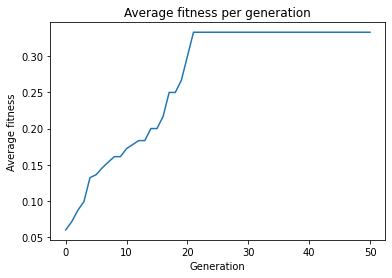

In [12]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    population = []
    for _ in range(10): #populaçao de 10
        population.append(Chromossome())

    generation = 0
    population_score = Problem.g_average(population) # analisando o score da população

    # variavel auxuliar para o plot 
    generation_plot = []
    generation_plot.append(generation)

    population_score_plot = []
    population_score_plot.append(population_score)

    while generation < 50: # 50 gerações de chomossomos 
        parent1, parent2 = GeneticOperators.selection(population)  # gerando os pais 

        GeneticOperators.crossover(population, parent1, parent2) # aplicar o crossover
        GeneticOperators.mutation(population) # ve se vai ter mutação
        GeneticOperators.elitism(population) # eliminando os piores da população

        generation += 1 # mais 1 geração feita
        population_score = Problem.g_average(population) # calculando o novo g score da populçao 

        generation_plot.append(generation)
        population_score_plot.append(population_score)

        print(f"Generation # {generation} -> Average population score = {population_score:.3f}\n") 

    best_chromossome = GeneticUtils.find_best_chromossome(population) # melhor cromossomo
    print(f"Best individual: {GeneticUtils.format_chromossome(best_chromossome)}")

    plt.gca().set_xlabel('Generation')
    plt.gca().set_ylabel('Average fitness')
    plt.gca().set_title('Average fitness per generation')
    plt.plot(generation_plot, population_score_plot)
    plt.show()